# EDA BFP : 1 Feature 

#### 1. Load & Understand our data

In [2]:
import pandas as pd 

dataset = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')
dataset['Crude_Rands'] = (dataset.Avg_Brent_Crude * dataset.Ex_Rate)
dataset.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675


In [3]:
dataset.shape

(147, 6)

In [4]:
dataset.columns

Index(['Date', 'BFP', 'Ex_Rate', 'Avg_Brent_Crude', 'Petrol', 'Crude_Rands'], dtype='object')

In [5]:
dataset.describe()

,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,640.008156,11.940469,75.918231,1335.749912,843.021648
std,137.463177,3.130337,26.278941,276.116053,205.333792
min,274.770000,6.770100,18.990000,786.000000,350.880129
25%,549.820000,8.794050,54.985000,1195.700000,665.399415
50%,620.870000,12.860900,72.510000,1329.700000,842.732274
75%,727.120000,14.463200,102.730000,1491.553500,971.138913
max,1100.270000,18.477100,126.390000,2159.500000,1469.238100


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             147 non-null    datetime64[ns]
 1   BFP              147 non-null    float64       
 2   Ex_Rate          147 non-null    float64       
 3   Avg_Brent_Crude  147 non-null    float64       
 4   Petrol           147 non-null    float64       
 5   Crude_Rands      147 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 7.0 KB


#### 2. Data Cleaning

Check for any null values

In [7]:
dataset.isnull().sum()

Date               0
BFP                0
Ex_Rate            0
Avg_Brent_Crude    0
Petrol             0
Crude_Rands        0
dtype: int64

Check for any duplicates

In [8]:
#returns the sum of duplicates
dataset.duplicated().sum()

0

#### 3. Data Visualization

a. Data distribution

Our labels

In [26]:
import plotly.express as px

fig = px.histogram(dataset, x="BFP" , nbins=10, title="Label A: BFP", width=800, height=400)
fig.show()

In [27]:
fig = px.histogram(dataset, x="Petrol" , nbins=10, title="Label B: Petrol", width=800, height=400)
fig.show()

Our Features

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot


# chart 1
chart1 = go.Histogram(x=dataset.Crude_Rands)

# chart 2
chart2 = go.Histogram(x=dataset.Avg_Brent_Crude)

#chart 3
chart3 = go.Histogram(x=dataset.Ex_Rate)



fig = make_subplots(rows=1, cols=4, subplot_titles=("Crude Oil(Rands): Main Feature", "Crude Oil : Sub-Feature A", 'Exchange-Rate : Sub-Feature B'))
fig.append_trace(chart1, 1, 1)
fig.append_trace(chart2, 1, 2)
fig.append_trace(chart3, 1, 3)
fig['layout'].update(height=600, width=1200,
					title='Features')
iplot(fig)


<AxesSubplot:xlabel='Ex_Rate', ylabel='Count'>

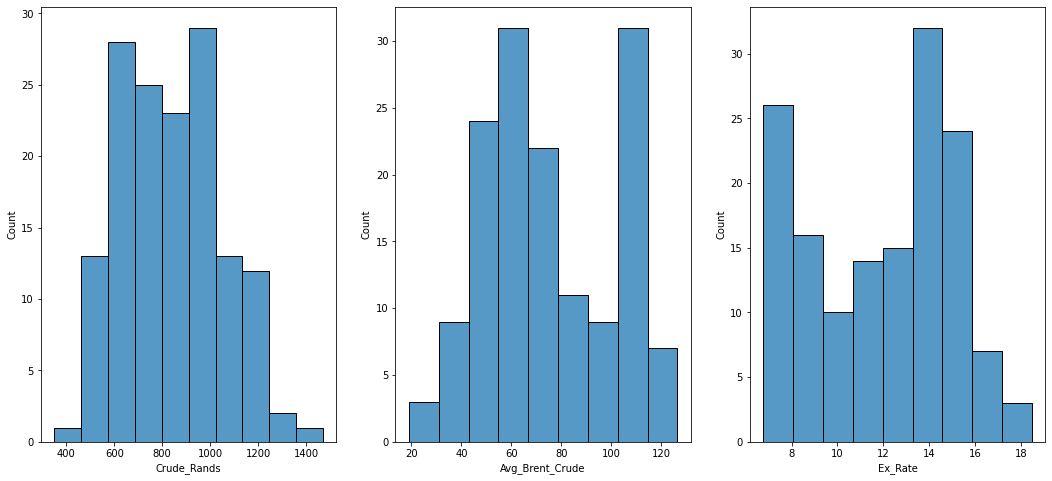

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(18,8))

#create chart in each subplot
sns.histplot(data=dataset, x='Crude_Rands', ax=axes[0])
sns.histplot(data=dataset, x='Avg_Brent_Crude', ax=axes[1])
sns.histplot(data=dataset, x='Ex_Rate', ax=axes[2])



<AxesSubplot:xlabel='Ex_Rate'>

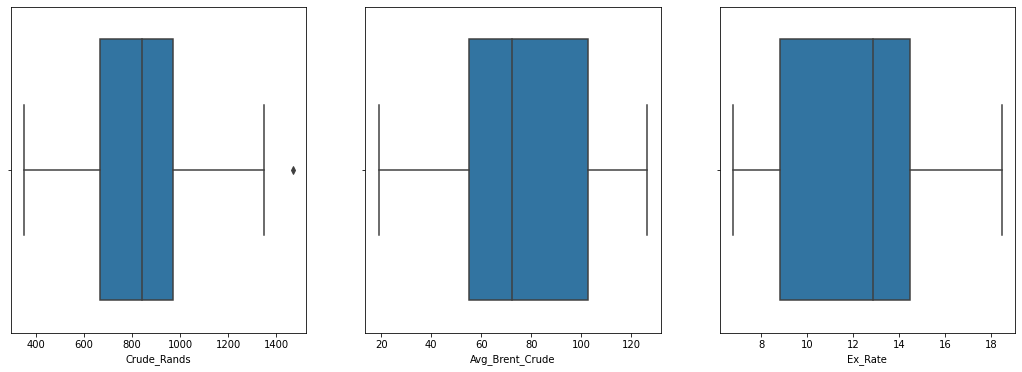

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(18,6))

#create chart in each subplot
sns.boxplot(data=dataset, x='Crude_Rands', ax=axes[0])
sns.boxplot(data=dataset, x='Avg_Brent_Crude', ax=axes[1])
sns.boxplot(data=dataset, x='Ex_Rate', ax=axes[2])

b. Graph compilation

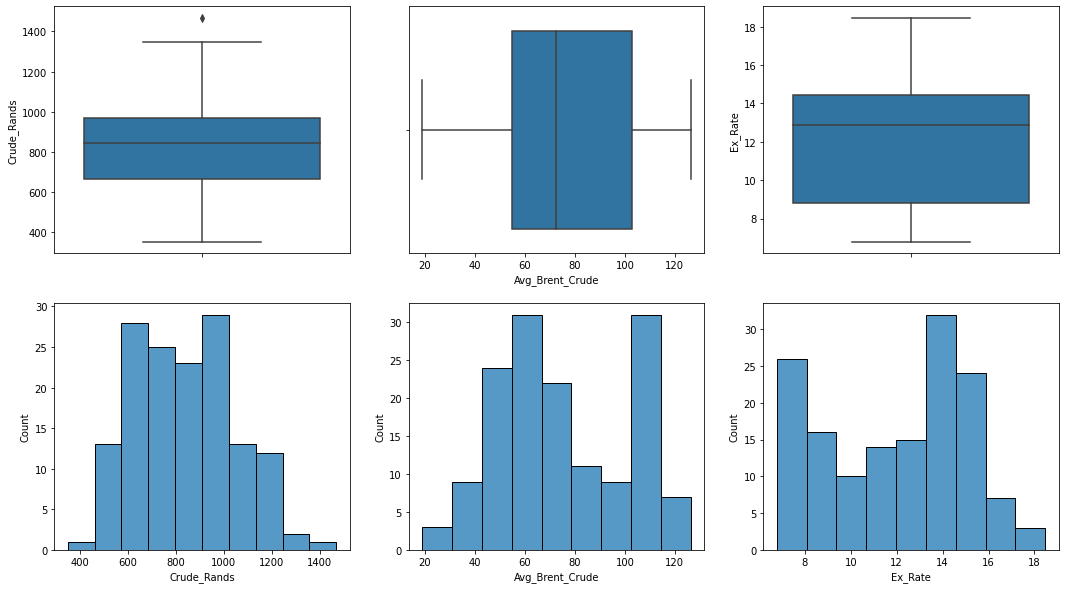

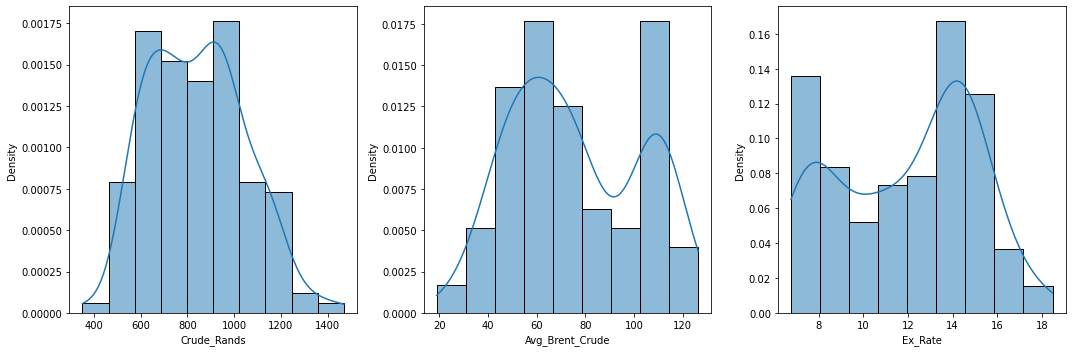

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 3, figsize=(18,10))

#create chart in each subplot in row 1
sns.boxplot(data=dataset, y='Crude_Rands', ax=axes[0,0])
sns.boxplot(data=dataset, x='Avg_Brent_Crude', ax=axes[0,1])
sns.boxplot(data=dataset, y='Ex_Rate', ax=axes[0,2])


#create chart in each subplot in row 2
sns.histplot(data=dataset, x='Crude_Rands', ax=axes[1,0])
sns.histplot(data=dataset, x='Avg_Brent_Crude', ax=axes[1,1])
sns.histplot(data=dataset, x='Ex_Rate', ax=axes[1,2])


#Create another graph for the distribution

cols = ['Crude_Rands','Avg_Brent_Crude', 'Ex_Rate']

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()


#### 4. Detect and remove outliers

In [14]:
# Remove the outlier which is less that 350 
#dataset = dataset.loc[(dataset['Crude_Rands'] < 1120)]
#sns.boxplot(data=dataset, y='Crude_Rands')

#### 5. Relationship Analysis : Scatter Plots

Text(0.5, 1.0, 'Exchange Rate vs Petrol')

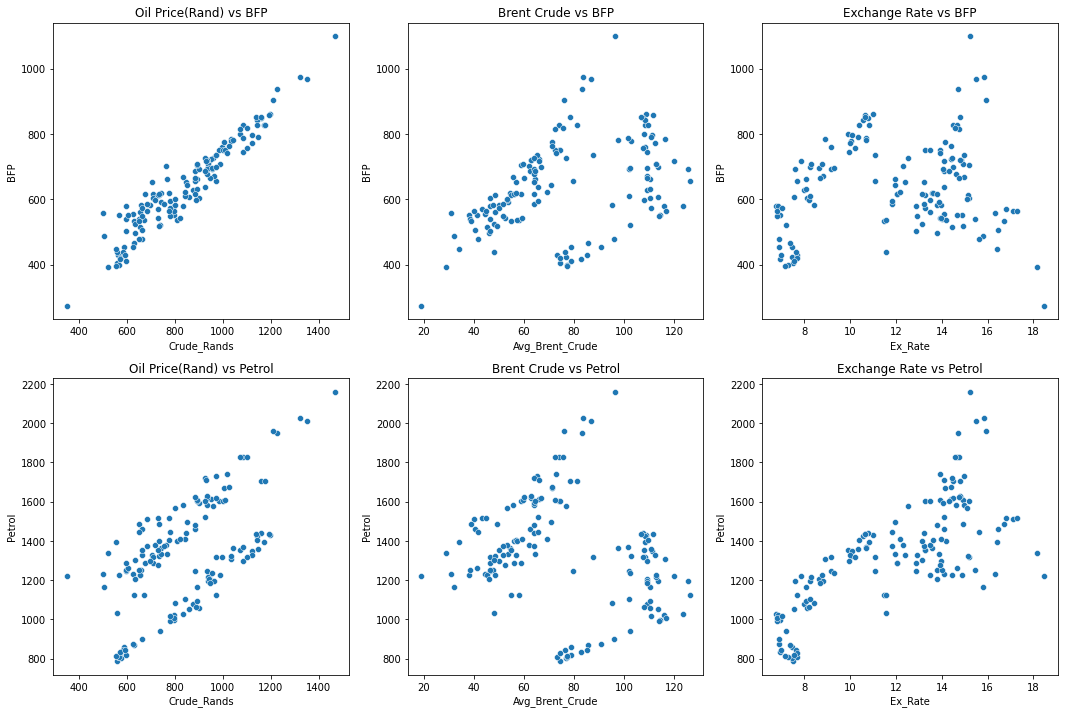

In [30]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 3, figsize=(18,12))

#create chart in each subplot : BFP
sns.scatterplot(data=dataset, x='Crude_Rands',y='BFP', ax=axes[0,0])
axes[0,0].set_title('Oil Price(Rand) vs BFP')


sns.scatterplot(data=dataset, x='Avg_Brent_Crude', y='BFP', ax=axes[0,1])
axes[0,1].set_title('Brent Crude vs BFP')

sns.scatterplot(data=dataset, x='Ex_Rate', y='BFP', ax=axes[0,2])
axes[0,2].set_title('Exchange Rate vs BFP')


#create chart in each subplot : Petrol
sns.scatterplot(data=dataset, x='Crude_Rands',y='Petrol', ax=axes[1,0])
axes[1,0].set_title('Oil Price(Rand) vs Petrol')


sns.scatterplot(data=dataset, x='Avg_Brent_Crude', y='Petrol', ax=axes[1,1])
axes[1,1].set_title('Brent Crude vs Petrol')

sns.scatterplot(data=dataset, x='Ex_Rate', y='Petrol', ax=axes[1,2])
axes[1,2].set_title('Exchange Rate vs Petrol')

#### 6. Descriptive statistics and data distribution

In [16]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


Our labels

Minimum:274.77
Mean:640.01
Median:620.87
Mode:615.65
Maximum:1100.27

Minimum:786.00
Mean:1335.75
Median:1329.70
Mode:844.80
Maximum:2159.50



C:\Users\PC\AppData\Local\Temp/ipykernel_2992/3792750813.py:40: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\PC\AppData\Local\Temp/ipykernel_2992/3792750813.py:40: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



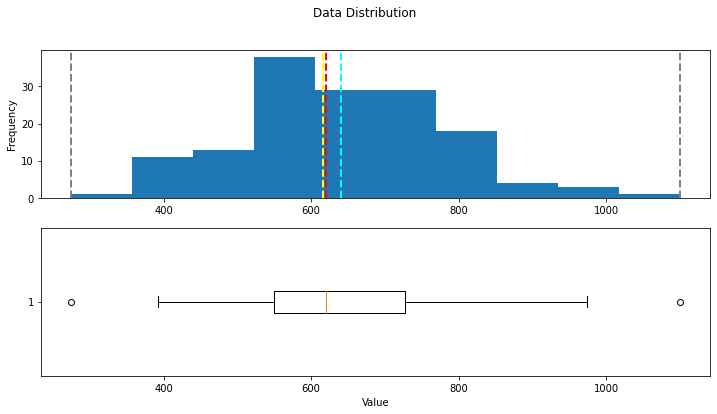

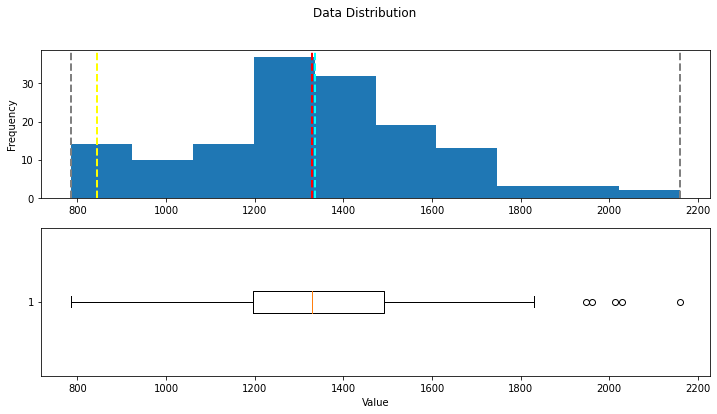

In [17]:
# Get the variable to examine
col_BFP = dataset['BFP']
# Call the function
show_distribution(col_BFP)

# Get the variable to examine
col_Petrol = dataset['Petrol']
# Call the function
show_distribution(col_Petrol)


In [18]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

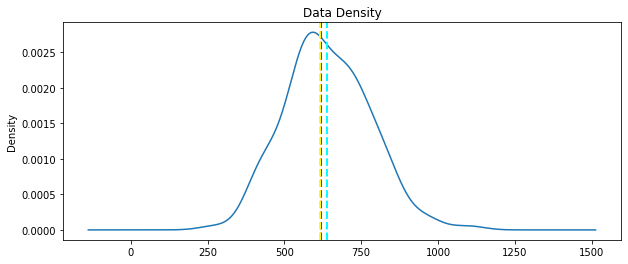

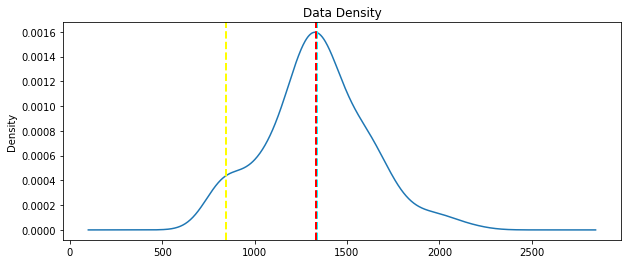

In [19]:
# Get the density of BFP
col_BFP = dataset['BFP']

show_density(col_BFP)

# Get the density of Petrol
col_Petrol = dataset['Petrol']

show_density(col_Petrol)

#### 7. Relationship Analysis : Corrolation

BFP

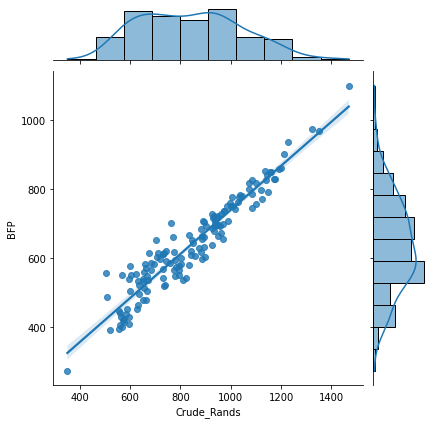

In [20]:
# Show a graph of the result

sns.jointplot(data = dataset, x="Crude_Rands", y="BFP", kind="reg", ax=axes[0])


In [21]:
import plotly.express as px

fig = px.scatter_3d(dataset, x='Avg_Brent_Crude', y='Ex_Rate', z='BFP', color='BFP')
fig.show()

Check corelation between the selected features and the label

<AxesSubplot:>

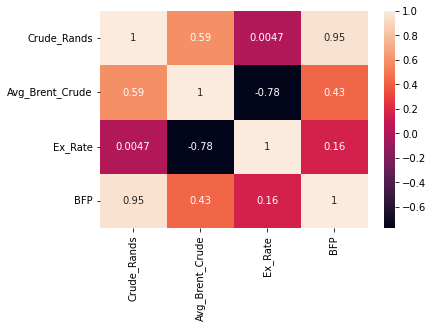

In [22]:
df = dataset[['Crude_Rands', 'Avg_Brent_Crude', 'Ex_Rate', 'BFP']]

corelation = df.corr()
#Create the graph
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

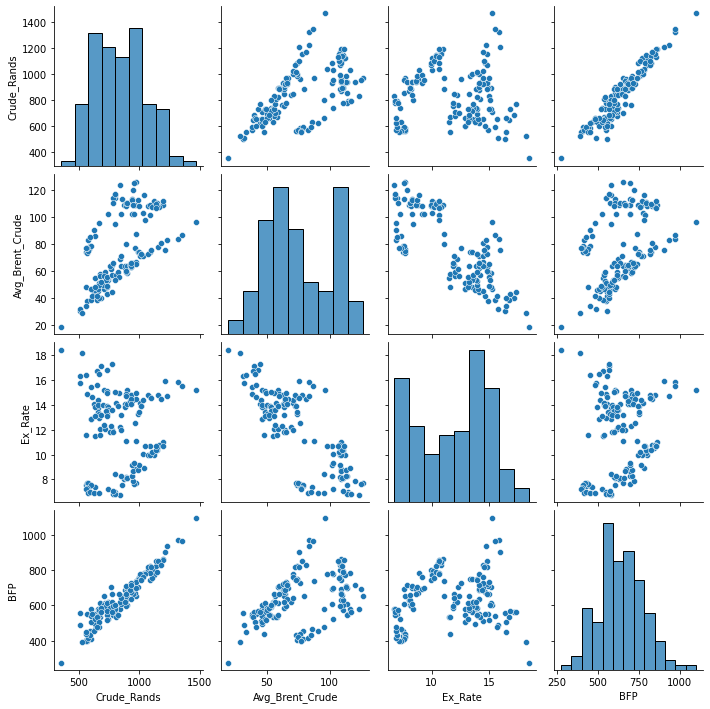

In [23]:
sns.pairplot(df)